## XGBoost - GASIF H2/CO - 2bins - 50/50

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, r2_score, mean_absolute_error, root_mean_squared_error
from xgboost import XGBClassifier, XGBRegressor
import matplotlib.pyplot as plt
from sklearn import metrics
import pycm
from ast import literal_eval
import sys
sys.path.append("../plotutils/")
from plotutils import *
plt.style.use("../plotutils/your.mplstyle")

In [2]:
df = pd.read_csv(f"../GasificationBiomass_dataset.csv", sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BIOMASS_name     50 non-null     object 
 1   HHVbiom (MJ/kg)  50 non-null     float64
 2   C (%)            50 non-null     float64
 3   H (%)            50 non-null     float64
 4   O (%)            50 non-null     float64
 5   ash (%)          50 non-null     float64
 6   VM (%)           50 non-null     float64
 7   FC (%)           50 non-null     float64
 8   MC (%)           50 non-null     float64
 9   H2_CO            50 non-null     float64
 10  H2CO_2bins_5050  50 non-null     int64  
 11  H2CO_7030        50 non-null     int64  
 12  name_all_prop    50 non-null     object 
dtypes: float64(9), int64(2), object(2)
memory usage: 5.2+ KB


In [3]:
def prepare_dataset_classification(
    df,
    target = "H2CO_2bins_5050",
    representation = list(df.iloc[:,2:10].columns),
    random_state=42,
    train_size=30
):
    df_train, df_val_test = train_test_split(
        df,
        train_size=train_size,
        random_state=random_state,
        stratify=df[target].astype(int).values,
    )
    print(len(df_train), len(df_val_test))
    
    df_val, df_test = train_test_split(
        df_val_test,
        train_size=0.5,
        random_state=random_state,
        stratify=df_val_test[target].astype(int).values,
    )
    print(len(df_val), len(df_test))
    
    X_train, y_train = df_train[representation], df_train[target]
    X_val, y_val = df_val[representation], df_val[target]
    X_test, y_test = df_test[representation], df_test[target]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [4]:
def train_and_evaluate_classifier(X_train, y_train, X_val, y_val, X_test, y_test, random_state=42):
    clf = XGBClassifier(
        #learning_rate = 0.1,
        n_estimators=100, 
        random_state=random_state, 
        early_stopping_rounds=10,
        objective="binary:logistic",
        #use_label_encoder=False, 
        eval_metric="logloss"
    )
    
    clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose=5)
    
    y_pred = clf.predict(X_test)
    y_test = np.array(y_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    f1_micro = f1_score(y_test, y_pred, average="micro")
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_test, y_pred)
    
    return y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa

In [5]:
def metrics_dict():
    metrics_dict = {
        "train_size": train_size,
        "y_true": y_test_all,
        "y_pred": y_pred_all,
        "accuracy": acc_scores,
        "f1_macro": f1macro_scores,
        "f1_micro": f1micro_scores,
        "f1_weighted": f1weighted_scores,
        "kappa": kappa_scores
    }
    return metrics_dict

### training size = 5

In [6]:
train_size = 5
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [7]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
5 45
22 23
random_state = 42
[0]	validation_0-logloss:0.67301	validation_1-logloss:0.71310
[5]	validation_0-logloss:0.67301	validation_1-logloss:0.71337
[10]	validation_0-logloss:0.67301	validation_1-logloss:0.71348
Accuracy: 0.4782608695652174
F1 macro: 0.3235294117647059
F1 micro: 0.4782608695652174
F1 weighted: 0.309462915601023
Kappa: 0.0
-------------Iteration 2/10
5 45
22 23
random_state = 43
[0]	validation_0-logloss:0.67301	validation_1-logloss:0.71310
[5]	validation_0-logloss:0.67301	validation_1-logloss:0.71337
[10]	validation_0-logloss:0.67301	validation_1-logloss:0.71348
Accuracy: 0.4782608695652174
F1 macro: 0.3235294117647059
F1 micro: 0.4782608695652174
F1 weighted: 0.309462915601023
Kappa: 0.0
-------------Iteration 3/10
5 45
22 23
random_state = 44
[0]	validation_0-logloss:0.67301	validation_1-logloss:0.71310
[5]	validation_0-logloss:0.67301	validation_1-logloss:0.71337
[9]	validation_0-logloss:0.67301	validation_1-logloss:0.71347
Accuracy: 0

In [8]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 5
mean accuracy: 0.47826086956521746 +/- 5.551115123125783e-17
mean F1 macro: 0.32352941176470595 +/- 5.551115123125783e-17
mean F1 micro: 0.47826086956521746 +/- 5.551115123125783e-17
mean F1 weighted: 0.309462915601023 +/- 0.0
mean Kappa: 0.0 +/- 0.0


In [9]:
compiled_res_5 = pd.DataFrame(metrics_dict())
compiled_res_5.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,5,"[0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.478261,0.323529,0.478261,0.309463,0.0
1,5,"[1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.478261,0.323529,0.478261,0.309463,0.0
2,5,"[1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.478261,0.323529,0.478261,0.309463,0.0


### training size = 10

In [10]:
train_size = 10
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [11]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
10 40
20 20
random_state = 42
[0]	validation_0-logloss:0.59394	validation_1-logloss:0.60804
[5]	validation_0-logloss:0.43516	validation_1-logloss:0.40476
[10]	validation_0-logloss:0.39805	validation_1-logloss:0.35994
[15]	validation_0-logloss:0.39728	validation_1-logloss:0.35616
[20]	validation_0-logloss:0.39728	validation_1-logloss:0.35624
[21]	validation_0-logloss:0.39728	validation_1-logloss:0.35624
Accuracy: 0.85
F1 macro: 0.849624060150376
F1 micro: 0.85
F1 weighted: 0.849624060150376
Kappa: 0.7
-------------Iteration 2/10
10 40
20 20
random_state = 43
[0]	validation_0-logloss:0.59394	validation_1-logloss:0.72934
[5]	validation_0-logloss:0.43516	validation_1-logloss:0.68004
[10]	validation_0-logloss:0.40056	validation_1-logloss:0.67356
[15]	validation_0-logloss:0.40056	validation_1-logloss:0.67346
[16]	validation_0-logloss:0.40056	validation_1-logloss:0.67345
Accuracy: 0.65
F1 macro: 0.6419437340153453
F1 micro: 0.65
F1 weighted: 0.6419437340153452
Kapp

In [12]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 10
mean accuracy: 0.705 +/- 0.12932517156377563
mean F1 macro: 0.6972120292324897 +/- 0.13745371159390443
mean F1 micro: 0.705 +/- 0.12932517156377563
mean F1 weighted: 0.6972120292324895 +/- 0.1374537115939044
mean Kappa: 0.41 +/- 0.25865034312755125


In [13]:
compiled_res_10 = pd.DataFrame(metrics_dict())
compiled_res_10.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,10,"[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, ...","[0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, ...",0.85,0.849624,0.85,0.849624,0.7
1,10,"[0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, ...","[0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, ...",0.65,0.641944,0.65,0.641944,0.3
2,10,"[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, ...","[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, ...",0.80,0.800000,0.80,0.800000,0.6


### training size = 15

In [14]:
train_size = 15
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [15]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
15 35
17 18
random_state = 42
[0]	validation_0-logloss:0.55621	validation_1-logloss:0.62041
[5]	validation_0-logloss:0.29579	validation_1-logloss:0.52487
[10]	validation_0-logloss:0.23247	validation_1-logloss:0.45260
[15]	validation_0-logloss:0.21754	validation_1-logloss:0.44246
[20]	validation_0-logloss:0.21754	validation_1-logloss:0.44245
[25]	validation_0-logloss:0.21754	validation_1-logloss:0.44245
[30]	validation_0-logloss:0.21754	validation_1-logloss:0.44245
[35]	validation_0-logloss:0.21754	validation_1-logloss:0.44245
[40]	validation_0-logloss:0.21754	validation_1-logloss:0.44245
[45]	validation_0-logloss:0.21754	validation_1-logloss:0.44245
[50]	validation_0-logloss:0.21754	validation_1-logloss:0.44245
[55]	validation_0-logloss:0.21754	validation_1-logloss:0.44245
[60]	validation_0-logloss:0.21754	validation_1-logloss:0.44245
[65]	validation_0-logloss:0.21754	validation_1-logloss:0.44245
[70]	validation_0-logloss:0.21754	validation_1-logloss:0.44245

In [16]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 15
mean accuracy: 0.7388888888888889 +/- 0.09953596037316066
mean F1 macro: 0.7363517249004865 +/- 0.10034739445080847
mean F1 micro: 0.7388888888888889 +/- 0.09953596037316066
mean F1 weighted: 0.7363517249004865 +/- 0.10034739445080848
mean Kappa: 0.47777777777777786 +/- 0.19907192074632132


In [17]:
compiled_res_15 = pd.DataFrame(metrics_dict())
compiled_res_15.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,15,"[1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, ...","[1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, ...",0.833333,0.832817,0.833333,0.832817,0.666667
1,15,"[1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, ...","[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, ...",0.722222,0.714286,0.722222,0.714286,0.444444
2,15,"[0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, ...","[1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, ...",0.833333,0.832817,0.833333,0.832817,0.666667


### training size = 20

In [18]:
train_size = 20
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [19]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
20 30
15 15
random_state = 42
[0]	validation_0-logloss:0.54904	validation_1-logloss:0.62639
[5]	validation_0-logloss:0.27524	validation_1-logloss:0.48356
[10]	validation_0-logloss:0.18174	validation_1-logloss:0.47113
[15]	validation_0-logloss:0.14633	validation_1-logloss:0.45355
[20]	validation_0-logloss:0.14031	validation_1-logloss:0.44445
[25]	validation_0-logloss:0.14031	validation_1-logloss:0.44470
[27]	validation_0-logloss:0.14031	validation_1-logloss:0.44474
Accuracy: 0.8666666666666667
F1 macro: 0.8660714285714286
F1 micro: 0.8666666666666667
F1 weighted: 0.8666666666666667
Kappa: 0.7321428571428572
-------------Iteration 2/10
20 30
15 15
random_state = 43
[0]	validation_0-logloss:0.54904	validation_1-logloss:0.65306
[5]	validation_0-logloss:0.26418	validation_1-logloss:0.49551
[10]	validation_0-logloss:0.18424	validation_1-logloss:0.51429
[15]	validation_0-logloss:0.14808	validation_1-logloss:0.51328
[20]	validation_0-logloss:0.13498	validation_1-log

In [20]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 20
mean accuracy: 0.7733333333333332 +/- 0.08537498983243802
mean F1 macro: 0.7673117323852617 +/- 0.09042350035939045
mean F1 micro: 0.7733333333333332 +/- 0.08537498983243802
mean F1 weighted: 0.768955469367234 +/- 0.08917769911993141
mean Kappa: 0.5423617694751836 +/- 0.17429885770307746


In [21]:
compiled_res_20 = pd.DataFrame(metrics_dict())
compiled_res_20.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,20,"[0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1]","[0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1]",0.866667,0.866071,0.866667,0.866667,0.732143
1,20,"[0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1]","[0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1]",0.666667,0.666667,0.666667,0.666667,0.336283
2,20,"[0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]","[1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1]",0.733333,0.732143,0.733333,0.730952,0.473684


### training size = 25

In [22]:
train_size = 25
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [23]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
25 25
12 13
random_state = 42
[0]	validation_0-logloss:0.56580	validation_1-logloss:0.61317
[5]	validation_0-logloss:0.28158	validation_1-logloss:0.51768
[10]	validation_0-logloss:0.17523	validation_1-logloss:0.48153
[15]	validation_0-logloss:0.13591	validation_1-logloss:0.46891
[20]	validation_0-logloss:0.11404	validation_1-logloss:0.45442
[25]	validation_0-logloss:0.10357	validation_1-logloss:0.47124
[29]	validation_0-logloss:0.10357	validation_1-logloss:0.47125
Accuracy: 0.9230769230769231
F1 macro: 0.9212121212121211
F1 micro: 0.9230769230769231
F1 weighted: 0.9221445221445221
Kappa: 0.8433734939759037
-------------Iteration 2/10
25 25
12 13
random_state = 43
[0]	validation_0-logloss:0.56773	validation_1-logloss:0.63057
[5]	validation_0-logloss:0.27980	validation_1-logloss:0.32955
[10]	validation_0-logloss:0.19166	validation_1-logloss:0.31764
[15]	validation_0-logloss:0.15448	validation_1-logloss:0.30328
[20]	validation_0-logloss:0.13148	validation_1-log

In [24]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 25
mean accuracy: 0.8461538461538464 +/- 0.06880209161537815
mean F1 macro: 0.843705044955045 +/- 0.06969229482850271
mean F1 micro: 0.8461538461538464 +/- 0.06880209161537815
mean F1 weighted: 0.8448310023310025 +/- 0.06924177611205952
mean Kappa: 0.6896861559787006 +/- 0.1385102463133017


In [25]:
compiled_res_25 = pd.DataFrame(metrics_dict())
compiled_res_25.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,25,"[1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0]","[1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0]",0.923077,0.921212,0.923077,0.922145,0.843373
1,25,"[0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0]","[0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0]",0.923077,0.923077,0.923077,0.923077,0.847059
2,25,"[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]","[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1]",0.769231,0.763636,0.769231,0.766434,0.530120


### training size = 30

In [26]:
train_size = 30
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [27]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
30 20
10 10
random_state = 42
[0]	validation_0-logloss:0.51347	validation_1-logloss:0.58994
[5]	validation_0-logloss:0.24776	validation_1-logloss:0.36393
[10]	validation_0-logloss:0.14644	validation_1-logloss:0.30284
[15]	validation_0-logloss:0.11494	validation_1-logloss:0.29656
[20]	validation_0-logloss:0.09707	validation_1-logloss:0.28791
[25]	validation_0-logloss:0.08643	validation_1-logloss:0.25527
[30]	validation_0-logloss:0.08047	validation_1-logloss:0.24944
[35]	validation_0-logloss:0.08047	validation_1-logloss:0.24894
[40]	validation_0-logloss:0.08047	validation_1-logloss:0.24872
[45]	validation_0-logloss:0.08047	validation_1-logloss:0.24863
[50]	validation_0-logloss:0.08047	validation_1-logloss:0.24863
[54]	validation_0-logloss:0.08047	validation_1-logloss:0.24863
Accuracy: 0.8
F1 macro: 0.7916666666666667
F1 micro: 0.8
F1 weighted: 0.7916666666666667
Kappa: 0.6
-------------Iteration 2/10
30 20
10 10
random_state = 43
[0]	validation_0-logloss:0.556

In [28]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 30
mean accuracy: 0.8100000000000002 +/- 0.13
mean F1 macro: 0.8063888888888888 +/- 0.13147935526201943
mean F1 micro: 0.8100000000000002 +/- 0.13
mean F1 weighted: 0.8063888888888888 +/- 0.13147935526201943
mean Kappa: 0.6199999999999999 +/- 0.26


In [29]:
compiled_res_30 = pd.DataFrame(metrics_dict())
compiled_res_30.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,30,"[0, 1, 1, 0, 1, 0, 0, 0, 1, 1]","[0, 1, 1, 0, 0, 0, 0, 0, 0, 1]",0.8,0.791667,0.8,0.791667,0.6
1,30,"[1, 0, 1, 1, 0, 1, 0, 0, 0, 1]","[1, 0, 1, 1, 1, 1, 0, 0, 0, 1]",0.9,0.898990,0.9,0.898990,0.8
2,30,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 1]","[1, 1, 0, 1, 0, 0, 0, 0, 0, 1]",0.9,0.898990,0.9,0.898990,0.8


### training size = 35

In [30]:
train_size = 35
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [31]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
35 15
7 8
random_state = 42
[0]	validation_0-logloss:0.55753	validation_1-logloss:0.62195
[5]	validation_0-logloss:0.24371	validation_1-logloss:0.52839
[10]	validation_0-logloss:0.13751	validation_1-logloss:0.56084
[13]	validation_0-logloss:0.11109	validation_1-logloss:0.57764
Accuracy: 0.875
F1 macro: 0.873015873015873
F1 micro: 0.875
F1 weighted: 0.873015873015873
Kappa: 0.75
-------------Iteration 2/10
35 15
7 8
random_state = 43
[0]	validation_0-logloss:0.55732	validation_1-logloss:0.60359
[5]	validation_0-logloss:0.26112	validation_1-logloss:0.31171
[10]	validation_0-logloss:0.16512	validation_1-logloss:0.25854
[15]	validation_0-logloss:0.13002	validation_1-logloss:0.22883
[20]	validation_0-logloss:0.11011	validation_1-logloss:0.21733
[25]	validation_0-logloss:0.09539	validation_1-logloss:0.20688
[30]	validation_0-logloss:0.08402	validation_1-logloss:0.18823
[35]	validation_0-logloss:0.07632	validation_1-logloss:0.18254
[40]	validation_0-logloss:0.07127

In [32]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 35
mean accuracy: 0.8375 +/- 0.1375
mean F1 macro: 0.8331746031746032 +/- 0.13947757328413604
mean F1 micro: 0.8375 +/- 0.1375
mean F1 weighted: 0.8331746031746032 +/- 0.13947757328413604
mean Kappa: 0.675 +/- 0.275


In [33]:
compiled_res_35 = pd.DataFrame(metrics_dict())
compiled_res_35.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,35,"[1, 0, 0, 1, 0, 1, 0, 1]","[1, 0, 0, 1, 0, 1, 0, 0]",0.875,0.873016,0.875,0.873016,0.75
1,35,"[1, 0, 1, 0, 1, 1, 0, 0]","[1, 0, 1, 0, 1, 1, 0, 0]",1.000,1.000000,1.000,1.000000,1.00
2,35,"[0, 1, 0, 0, 1, 0, 1, 1]","[1, 1, 0, 0, 1, 1, 1, 1]",0.750,0.733333,0.750,0.733333,0.50


### training size = 40

In [34]:
train_size = 40
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [35]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
40 10
5 5
random_state = 42
[0]	validation_0-logloss:0.53635	validation_1-logloss:0.67190
[5]	validation_0-logloss:0.19437	validation_1-logloss:0.74155
[10]	validation_0-logloss:0.11745	validation_1-logloss:0.78838
[12]	validation_0-logloss:0.09904	validation_1-logloss:0.76005
Accuracy: 0.8
F1 macro: 0.7619047619047619
F1 micro: 0.8
F1 weighted: 0.7809523809523808
Kappa: 0.5454545454545454
-------------Iteration 2/10
40 10
5 5
random_state = 43
[0]	validation_0-logloss:0.53636	validation_1-logloss:0.56772
[5]	validation_0-logloss:0.24855	validation_1-logloss:0.57278
[10]	validation_0-logloss:0.13903	validation_1-logloss:0.43898
[15]	validation_0-logloss:0.10607	validation_1-logloss:0.40794
[20]	validation_0-logloss:0.08892	validation_1-logloss:0.35348
[25]	validation_0-logloss:0.07746	validation_1-logloss:0.35184
[30]	validation_0-logloss:0.06886	validation_1-logloss:0.34325
[35]	validation_0-logloss:0.06306	validation_1-logloss:0.33824
[40]	validation_0-log

[50]	validation_0-logloss:0.06364	validation_1-logloss:0.06732
[52]	validation_0-logloss:0.06364	validation_1-logloss:0.06733
Accuracy: 0.8
F1 macro: 0.8
F1 micro: 0.8
F1 weighted: 0.8
Kappa: 0.6153846153846154


In [36]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 40
mean accuracy: 0.78 +/- 0.18867962264113208
mean F1 macro: 0.769047619047619 +/- 0.19162747307047118
mean F1 micro: 0.78 +/- 0.18867962264113208
mean F1 weighted: 0.7761904761904762 +/- 0.1884294800031045
mean Kappa: 0.55011655011655 +/- 0.3748839526447689


In [37]:
compiled_res_40 = pd.DataFrame(metrics_dict())
compiled_res_40.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,40,"[0, 0, 0, 1, 1]","[0, 0, 0, 1, 0]",0.8,0.761905,0.8,0.780952,0.545455
1,40,"[1, 0, 0, 1, 0]","[1, 0, 0, 1, 0]",1.0,1.000000,1.0,1.000000,1.000000
2,40,"[0, 0, 0, 1, 1]","[0, 0, 0, 1, 1]",1.0,1.000000,1.0,1.000000,1.000000


### training size = 45

In [38]:
train_size = 45
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [39]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
45 5
2 3
random_state = 42
[0]	validation_0-logloss:0.53095	validation_1-logloss:0.60136
[5]	validation_0-logloss:0.19057	validation_1-logloss:0.71115
[9]	validation_0-logloss:0.12385	validation_1-logloss:0.80011
Accuracy: 0.6666666666666666
F1 macro: 0.4
F1 micro: 0.6666666666666666
F1 weighted: 0.5333333333333333
Kappa: 0.0
-------------Iteration 2/10
45 5
2 3
random_state = 43
[0]	validation_0-logloss:0.54883	validation_1-logloss:0.49032
[5]	validation_0-logloss:0.22707	validation_1-logloss:0.13319
[10]	validation_0-logloss:0.13057	validation_1-logloss:0.10454
[15]	validation_0-logloss:0.09930	validation_1-logloss:0.08789
[20]	validation_0-logloss:0.08206	validation_1-logloss:0.09452
[24]	validation_0-logloss:0.07349	validation_1-logloss:0.09127
Accuracy: 0.6666666666666666
F1 macro: 0.6666666666666666
F1 micro: 0.6666666666666666
F1 weighted: 0.6666666666666666
Kappa: 0.3999999999999999
-------------Iteration 3/10
45 5
2 3
random_state = 44
[0]	validatio

In [40]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 45
mean accuracy: 0.8666666666666666 +/- 0.16329931618554522
mean F1 macro: 0.8133333333333332 +/- 0.2436755584332942
mean F1 micro: 0.8666666666666666 +/- 0.16329931618554522
mean F1 weighted: 0.8400000000000001 +/- 0.20044395171163878
mean Kappa: 0.6799999999999999 +/- 0.41182520563948005


In [41]:
compiled_res_45 = pd.DataFrame(metrics_dict())
compiled_res_45.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,45,"[0, 0, 1]","[0, 0, 0]",0.666667,0.400000,0.666667,0.533333,0.0
1,45,"[1, 0, 0]","[1, 1, 0]",0.666667,0.666667,0.666667,0.666667,0.4
2,45,"[0, 1, 0]","[0, 1, 0]",1.000000,1.000000,1.000000,1.000000,1.0


In [42]:
compiled_res = pd.concat([
    compiled_res_5, 
    compiled_res_10,
    compiled_res_15,
    compiled_res_20,
    compiled_res_25,
    compiled_res_30,
    compiled_res_35,
    compiled_res_40,
    compiled_res_45,
], ignore_index=True)
print(len(compiled_res))
compiled_res.head()

90


,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,5,"[0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.478261,0.323529,0.478261,0.309463,0.0
1,5,"[1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.478261,0.323529,0.478261,0.309463,0.0
2,5,"[1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.478261,0.323529,0.478261,0.309463,0.0
3,5,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.478261,0.323529,0.478261,0.309463,0.0
4,5,"[1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.478261,0.323529,0.478261,0.309463,0.0


In [43]:
compiled_res["y_true"] = compiled_res["y_true"].apply(lambda arr: list(arr))
compiled_res["y_pred"] = compiled_res["y_pred"].apply(lambda arr: list(arr))

In [45]:
compiled_res.to_csv("XGBoost_results_GASIF_2bins_5050.csv", sep=",", index=False)

In [46]:
df = pd.read_csv("XGBoost_results_GASIF_2bins_5050.csv", sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   train_size   90 non-null     int64  
 1   y_true       90 non-null     object 
 2   y_pred       90 non-null     object 
 3   accuracy     90 non-null     float64
 4   f1_macro     90 non-null     float64
 5   f1_micro     90 non-null     float64
 6   f1_weighted  90 non-null     float64
 7   kappa        90 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 5.8+ KB


In [47]:
df.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,5,"[0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.478261,0.323529,0.478261,0.309463,0.0
1,5,"[1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.478261,0.323529,0.478261,0.309463,0.0
2,5,"[1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.478261,0.323529,0.478261,0.309463,0.0


In [48]:
grouped_res = df.select_dtypes(include = ["int", "float"]).groupby(['train_size']).agg(['mean', 'sem'])
grouped_res

accuracy            f1_macro            f1_micro            \
                mean       sem      mean       sem      mean       sem   
train_size                                                               
5           0.478261  0.000000  0.323529  0.000000  0.478261  0.000000   
10          0.705000  0.043108  0.697212  0.045818  0.705000  0.043108   
15          0.738889  0.033179  0.736352  0.033449  0.738889  0.033179   
20          0.773333  0.028458  0.767312  0.030141  0.773333  0.028458   
25          0.846154  0.022934  0.843705  0.023231  0.846154  0.022934   
30          0.810000  0.043333  0.806389  0.043826  0.810000  0.043333   
35          0.837500  0.045833  0.833175  0.046493  0.837500  0.045833   
40          0.780000  0.062893  0.769048  0.063876  0.780000  0.062893   
45          0.866667  0.054433  0.813333  0.081225  0.866667  0.054433   

           f1_weighted               kappa            
                  mean       sem      mean       sem  
train_size                                            
5             0.309463  0.000000  0.000000  0.000000  
10            0.697212  0.045818  0.410000  0.086217  
15            0.736352  0.033449  0.477778  0.066357  
20            0.768955  0.029726  0.542362  0.058100  
25            0.844831  0.023081  0.689686  0.046170  
30            0.806389  0.043826  0.620000  0.086667  
35            0.833175  0.046493  0.675000  0.091667  
40            0.776190  0.062810  0.550117  0.124961  
45            0.840000  0.066815  0.680000  0.137275

In [49]:
conf_mats = []
for i in np.arange(len(df)):
    confusion_matrix = {
        'all_y_true': literal_eval(df["y_true"][i]),
        'all_y_pred': literal_eval(df["y_pred"][i])
    }
    conf_mats.append(confusion_matrix)

[[0.88235294 0.11764706]
 [0.15384615 0.84615385]]
accuracy: 0.8666666666666667


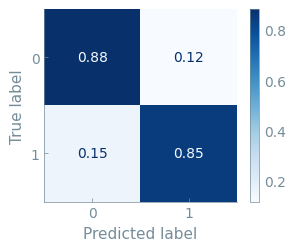

In [50]:
index_maxsize = compiled_res[compiled_res["train_size"]==max(compiled_res["train_size"])].index
conf_mats_max = [conf_mats[i] for i in index_maxsize]

actual_all, predicted_all = [], []
for index, _ in enumerate(conf_mats_max):
    preds = conf_mats_max[index]
    actual = preds["all_y_true"]
    predicted = preds["all_y_pred"]
    
    for true, pred in zip(actual, predicted):
        actual_all.append(true)
        predicted_all.append(pred)

confusion_matrix = metrics.confusion_matrix(actual_all, predicted_all)
confusion_matrix_norm = confusion_matrix.astype("float") / confusion_matrix.sum(axis=1)[:, np.newaxis]
print(confusion_matrix_norm)

cm = pycm.ConfusionMatrix(list(actual_all), list(predicted_all))
acc = cm.Overall_ACC

print(f'accuracy: {acc}')

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix_norm, display_labels = [0, 1])
cm_display.plot(cmap=plt.cm.Blues, include_values=True, values_format=".2f")
#plt.savefig('classif_GASIF_confusionMatrix_50_50_size45_XGBoost.pdf', bbox_inches='tight')